In [1]:
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = '1'

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train = X_train.reshape(X_train.shape[0], 28 ,28, 1).astype(float) / 255
X_test = X_test.reshape(X_test.shape[0], 28 ,28, 1).astype(float) / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation ='relu'))
model.add(layers.Conv2D(64, (3,3), activation ='relu'))
model.add(layers.MaxPooling2D (pool_size=(2,2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation ='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation ='softmax'))

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                      

In [8]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [9]:
h = model.fit(X_train, y_train, validation_split=0.25, epochs=50, batch_size =200, callbacks=[early_stopping])

Epoch 1/50
225/225 [==============================] - 184s 817ms/step - loss: 0.3326 - accuracy: 0.8972 - val_loss: 0.0756 - val_accuracy: 0.9779
Epoch 2/50
225/225 [==============================] - 179s 797ms/step - loss: 0.1024 - accuracy: 0.9690 - val_loss: 0.0537 - val_accuracy: 0.9840
Epoch 3/50
225/225 [==============================] - 194s 864ms/step - loss: 0.0738 - accuracy: 0.9784 - val_loss: 0.0472 - val_accuracy: 0.9855
Epoch 4/50
225/225 [==============================] - 188s 837ms/step - loss: 0.0587 - accuracy: 0.9821 - val_loss: 0.0417 - val_accuracy: 0.9880
Epoch 5/50
225/225 [==============================] - 197s 876ms/step - loss: 0.0499 - accuracy: 0.9852 - val_loss: 0.0406 - val_accuracy: 0.9880
Epoch 6/50
225/225 [==============================] - 189s 842ms/step - loss: 0.0430 - accuracy: 0.9868 - val_loss: 0.0465 - val_accuracy: 0.9869
Epoch 7/50
225/225 [==============================] - 198s 878ms/step - loss: 0.0388 - accuracy: 0.9874 - val_loss: 0.0415 -

In [11]:
print('Test Accuracy:.4f' % (model.evaluate(X_test, y_test)[1]))

 25/313 [=>............................] - ETA: 2:05 - loss: 0.0301 - accuracy: 0.9900

KeyboardInterrupt: 

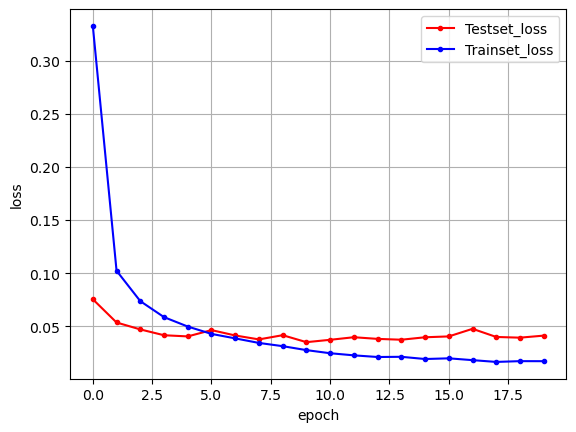

In [12]:
y_vloss = h.history['val_loss']
y_loss = h.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()